In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
class PegasosSVM:
    def __init__(self, lambda_param=0.01, max_iter=1000):
        self.lambda_param = lambda_param
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y = np.where(y <= 0, -1, 1)

        for t in range(1, self.max_iter + 1):
            idx = np.random.randint(0, n_samples)
            x_i = X[idx]
            y_i = y[idx]

            margin = y_i * (np.dot(x_i, self.weights) + self.bias)
            if margin >= 1:
                self.weights = (1 - 1/t) * self.weights
            else:
                self.weights = (1 - 1/t) * self.weights + self.lambda_param * y_i * x_i
                self.bias += self.lambda_param * y_i
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

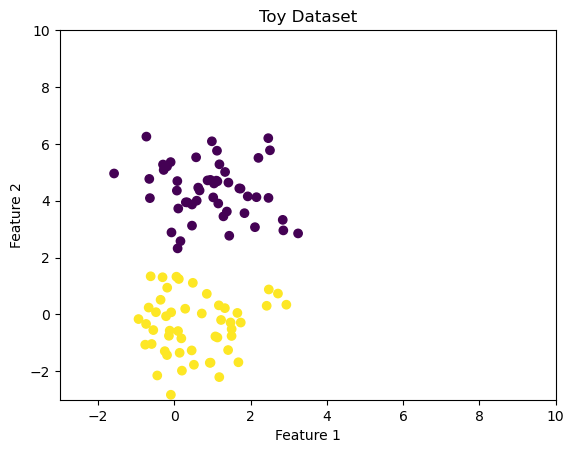

In [34]:

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
y = np.where(y == 0, -1, y)
X[y == 0] = X[y == 0] + 1.5
X[y == 1] = X[y == 1] - 1.5

X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
y = y*2 - 1

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlim((-3, 10))
plt.ylim((-3, 10))
plt.title('Toy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [35]:
model = PegasosSVM(lambda_param=0.1, max_iter=1000)
model.fit(X, y)

print("Weights:", model.weights)
print("Bias:", model.bias)

Weights: [-0.20680746 -1.87829611  0.5335    ]
Bias: 2.400000000000001


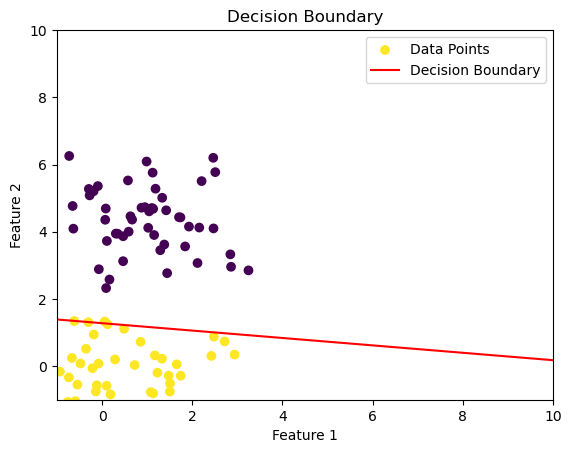

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Data Points')
plt.xlim((-1, 10))
plt.ylim((-1, 10))

w = model.weights
b = model.bias

x_boundary = np.array([-1, 10])
if w[1] != 0:
    y_boundary = (-w[0] / w[1]) * x_boundary - b / w[1]
    plt.plot(x_boundary, y_boundary, color='red', label='Decision Boundary')

plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()